In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### 

In [2]:
# read dataset after combing(in cleaned folder)
df_combined_population = pd.read_csv("../../data/curated/population_cleaned/df_combined_population.csv")

In [3]:
df_combined_population.describe()

,SA4 code,SA3 code,SA2 code,2001_population,2002_population,2003_population,2004_population,2005_population,2006_population,2007_population,...,2022_population,2023_population,ERP_2023_change_number,ERP_2023_change_percentage(%),natural_2023_increase_number,internal_2023_migration_number,overseas_2023_migration_number,area_in_square_kilometers,population_density_2023,estimated_2024_population
count,522.000000,522.000000,5.220000e+02,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,...,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,209.159004,20918.714559,2.091885e+08,9125.699234,9229.452107,9336.798851,9438.982759,9557.942529,9695.911877,9872.647510,...,12702.358238,13056.400383,354.042146,2.481801,56.423372,-3.568966,301.187739,435.816667,1833.328927,13434.400383
std,4.148353,414.936293,4.149476e+06,5513.929533,5480.346000,5440.074966,5409.838617,5391.663396,5393.301057,5405.839604,...,5960.126526,6196.410769,515.472094,3.306144,95.855472,360.912551,383.264084,1556.005461,2813.670988,6489.984305
min,201.000000,20101.000000,2.010110e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-185.000000,-4.200000,-190.000000,-915.000000,0.000000,0.600000,0.000000,0.000000
25%,206.000000,20604.000000,2.060411e+08,4910.250000,5100.250000,5289.250000,5462.250000,5566.750000,5622.500000,5827.000000,...,8320.250000,8490.750000,54.000000,0.625000,0.000000,-144.500000,63.250000,5.100000,101.500000,8602.250000
50%,210.000000,21001.000000,2.100112e+08,8865.000000,9139.000000,9163.000000,9315.000000,9494.000000,9583.500000,9837.500000,...,12399.000000,12848.500000,206.500000,1.700000,40.000000,-43.000000,185.500000,11.200000,1212.000000,13268.000000
75%,212.000000,21205.000000,2.120513e+08,12849.250000,12975.750000,13019.750000,13038.500000,13180.750000,13408.750000,13578.000000,...,16691.500000,17011.000000,458.000000,3.100000,83.750000,24.750000,394.500000,94.500000,2617.225000,17496.750000
max,217.000000,21704.000000,2.170415e+08,24279.000000,24227.000000,24189.000000,24124.000000,24051.000000,23965.000000,23898.000000,...,28727.000000,31976.000000,4299.000000,26.400000,722.000000,3443.000000,3722.000000,21568.800000,38401.000000,35781.000000


# Part A : use whole population to plot

### 1. Plot a rough histogram of population distribution in suburb


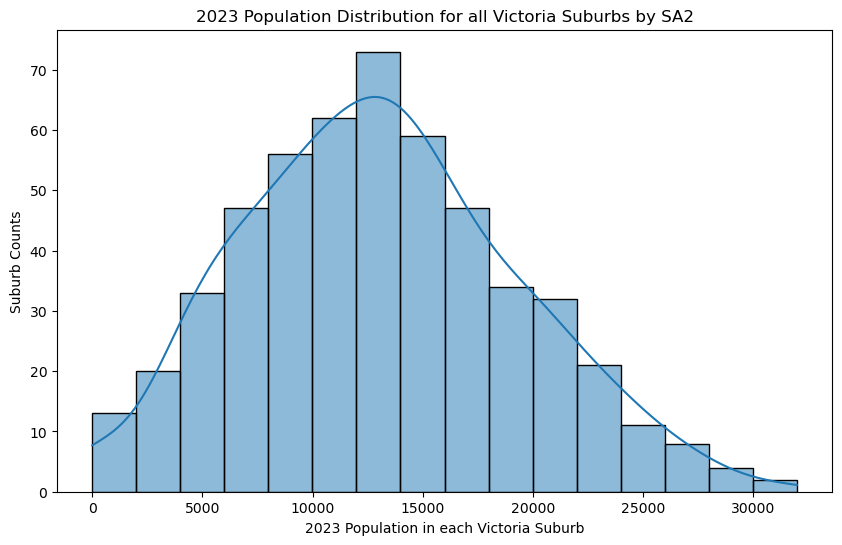

In [4]:
plt.figure(figsize=(10,6))
sns.histplot(df_combined_population['2023_population'], kde=True)
plt.title('2023 Population Distribution for all Victoria Suburbs by SA2')
plt.ylabel('Suburb Counts')
plt.xlabel('2023 Population in each Victoria Suburb')
plt.show()

### 2. Find the top 20 most populated suburbs in 2023

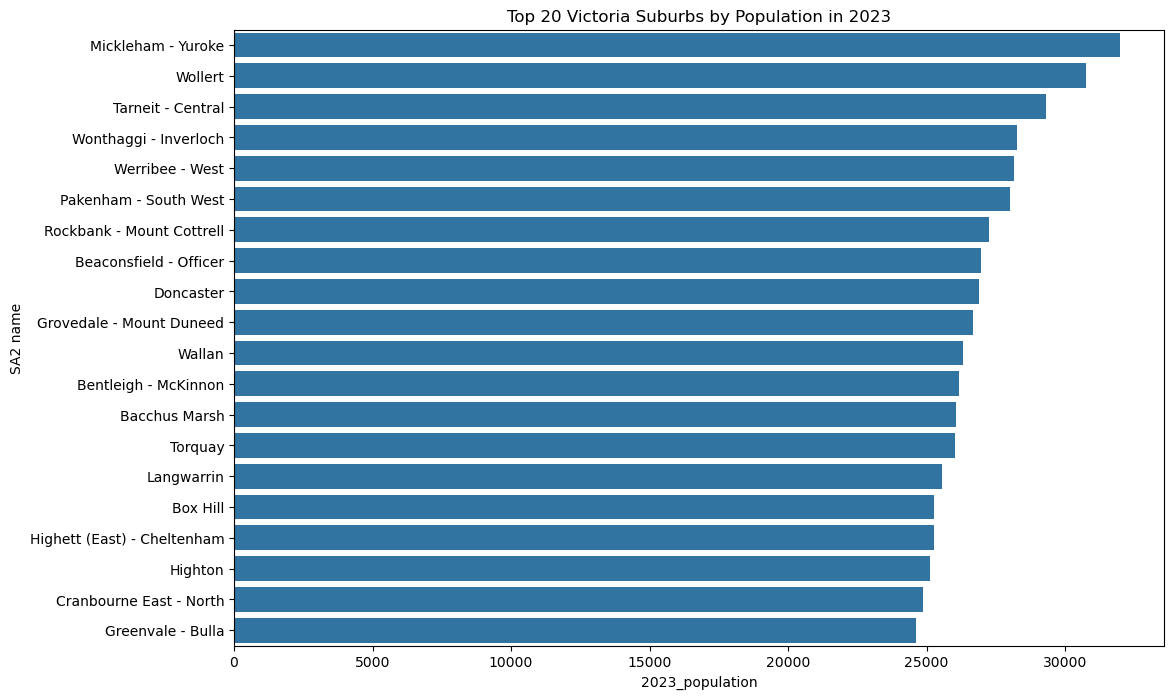

In [5]:
# Draw a bar chart by suburb
top_suburbs = df_combined_population.nlargest(20, '2023_population') 
plt.figure(figsize=(12,8))
sns.barplot(x='2023_population', y='SA2 name', data=top_suburbs)
plt.title('Top 20 Victoria Suburbs by Population in 2023')
plt.show()

### 3. Key Population Growth Trends for Top 5 Suburbs (2001-2023) 

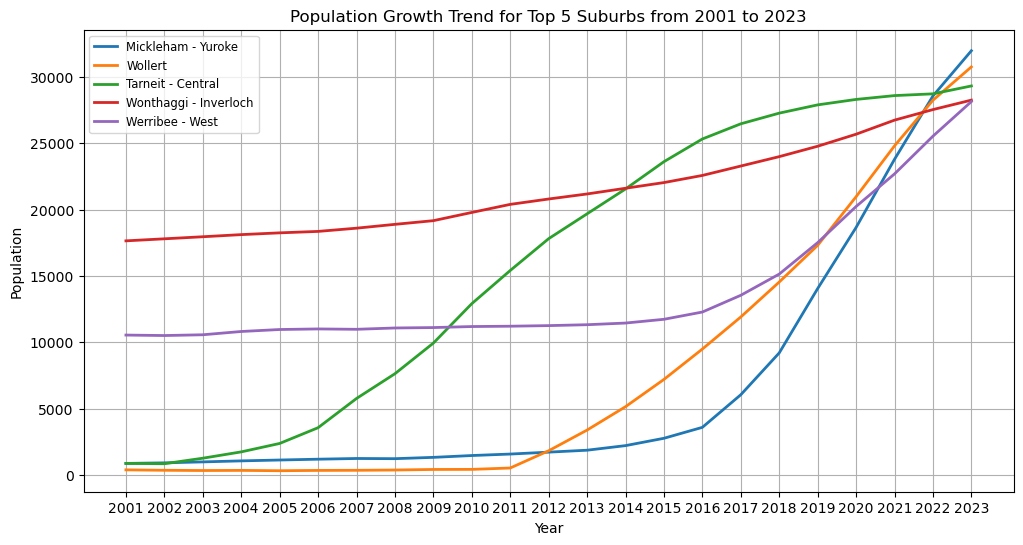

In [6]:
# Select the top 5 most populated suburbs
top_suburbs = df_combined_population.nlargest(5, '2023_population')

years = [str(year) + '_population' for year in range(2001, 2024)]

# Mapping population growth trends

top_suburbs.set_index('SA2 name')[years].T.plot(legend=True, figsize=(12,6), linewidth=2)

plt.legend(fontsize='small', loc='best')
plt.title('Population Growth Trend for Top 5 Suburbs from 2001 to 2023')
plt.xlabel('Year')
plt.ylabel('Population')

year_labels = [str(year) for year in range(2001, 2024)]
plt.xticks(ticks=range(len(years)), labels=year_labels)

plt.grid(True)

plt.show()

# Part B : Use the Population density in 2023 to plot

### 1.Boxplot of population density

Text(0.5, 0, 'Population Density (persons/km²)')

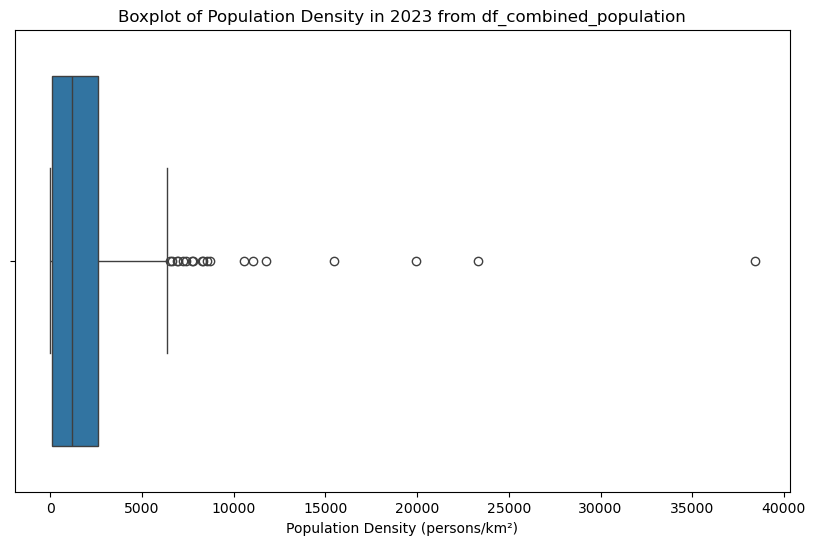

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_combined_population['population_density_2023'])

plt.title('Boxplot of Population Density in 2023 from df_combined_population')
plt.xlabel('Population Density (persons/km²)')


### 2. Find the top 20 most densely populated suburbs

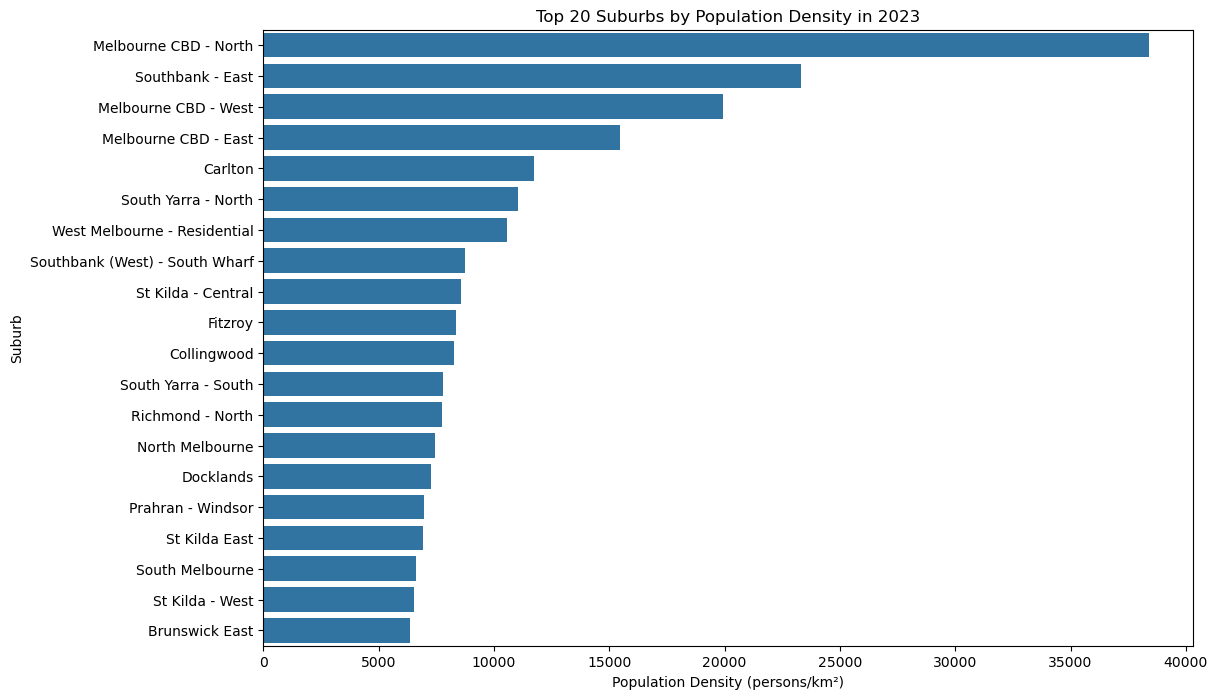

In [8]:
top_density_suburbs = df_combined_population.nlargest(20, 'population_density_2023')

plt.figure(figsize=(12, 8))

sns.barplot(x='population_density_2023', y='SA2 name', data=top_density_suburbs)

plt.title('Top 20 Suburbs by Population Density in 2023')
plt.xlabel('Population Density (persons/km²)')
plt.ylabel('Suburb')
plt.show()


### 3.Histogram to see population density

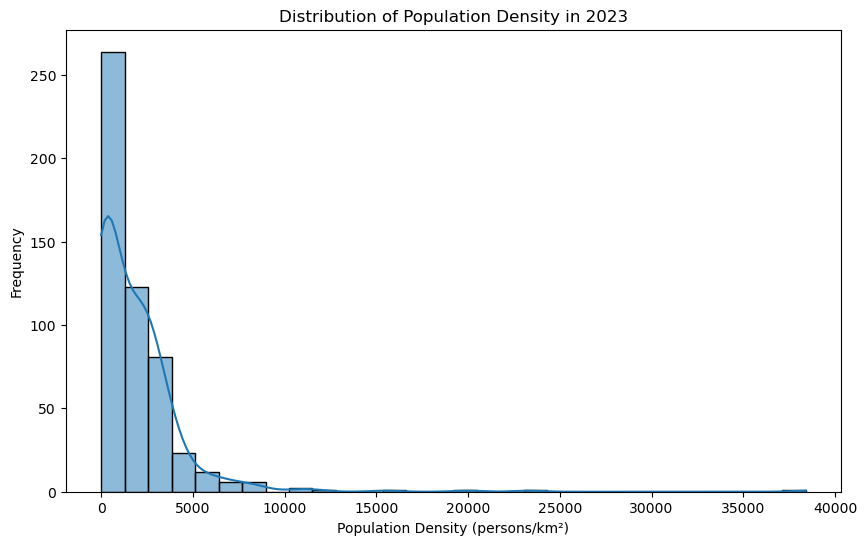

In [9]:
plt.figure(figsize=(10, 6))

sns.histplot(df_combined_population['population_density_2023'], bins=30, kde=True)

plt.title('Distribution of Population Density in 2023')
plt.xlabel('Population Density (persons/km²)')
plt.ylabel('Frequency')

plt.show()


### 4. scatter plot of population density and population growth rate


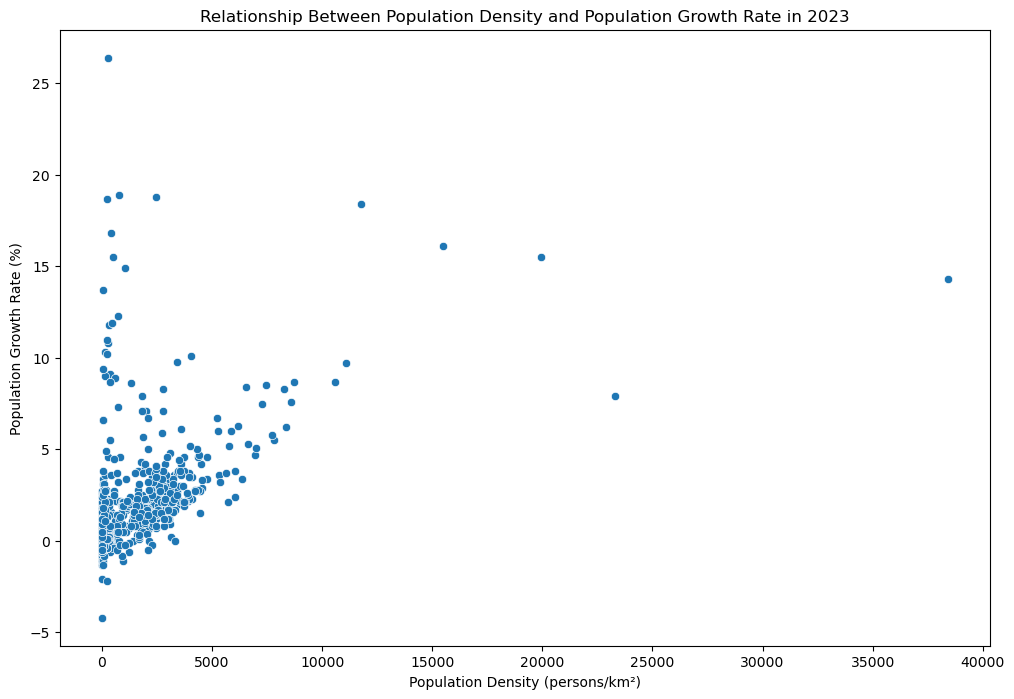

In [10]:
# 设置绘图尺寸
plt.figure(figsize=(12, 8))

# 绘制人口密度与人口增长率的散点图
sns.scatterplot(x='population_density_2023', y='ERP_2023_change_percentage(%)', data=df_combined_population)

# 添加标题和轴标签
plt.title('Relationship Between Population Density and Population Growth Rate in 2023')
plt.xlabel('Population Density (persons/km²)')
plt.ylabel('Population Growth Rate (%)')

# 显示图形
plt.show()


### 5. K-means for population density

/opt/anaconda3/envs/ADS/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/ADS/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/ADS/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/ADS/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

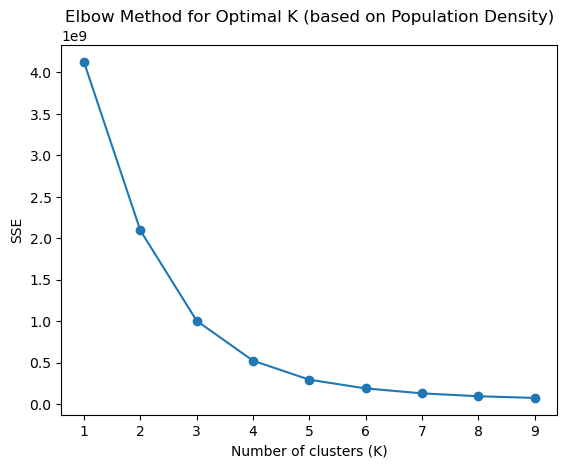

In [11]:
X = df_combined_population[['population_density_2023']]

# Apply the elbow
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 10), sse, marker='o')
plt.title('Elbow Method for Optimal K (based on Population Density)')
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSE')
plt.show()



/opt/anaconda3/envs/ADS/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


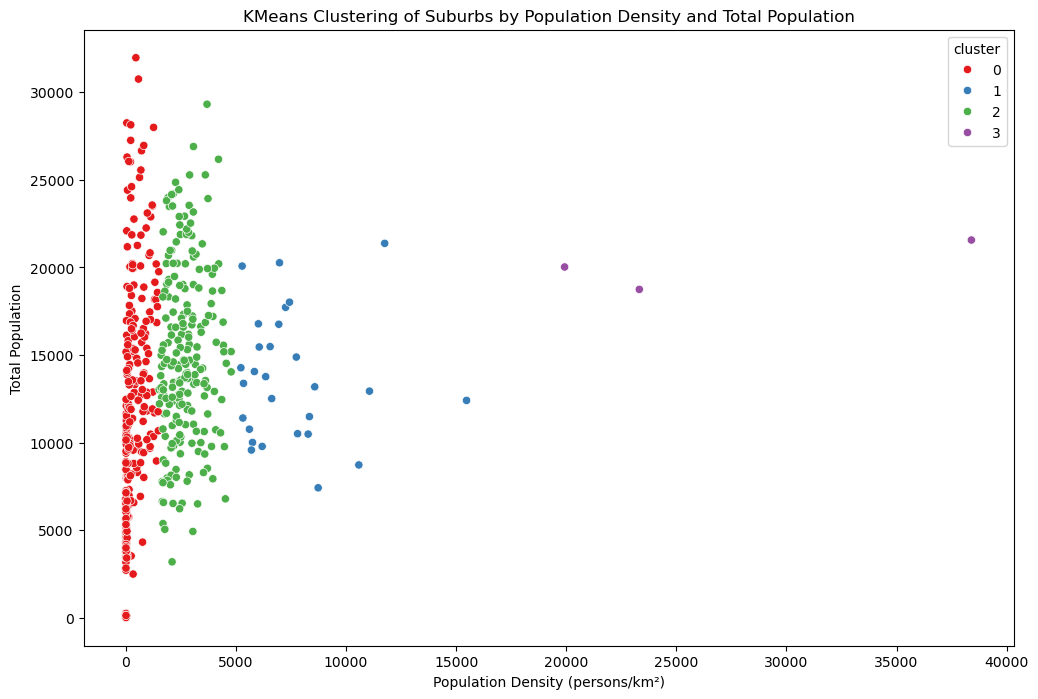

In [12]:
X = df_combined_population[['population_density_2023']]

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

df_combined_population['cluster'] = kmeans.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(x='population_density_2023', y='2023_population', hue='cluster', data=df_combined_population, palette='Set1')

plt.title('KMeans Clustering of Suburbs by Population Density and Total Population')
plt.xlabel('Population Density (persons/km²)')
plt.ylabel('Total Population')

plt.show()
